# PROJECT TEAM ID - PTID-CDS-DEC-23-1721
# CAPSTONE PROJECT 1 - PRCP-1025 - FLIGHT PRICE PREDICTION


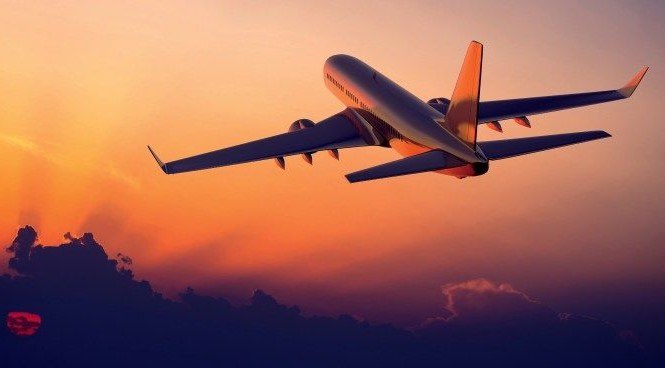

#  Problem Statement

* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.


* We might have often heard travelers saying that flight ticket prices are so unpredictable.

* That’s why we will try to use machine learning to solve this problem.

* This can help airlines by predicting what prices they can maintain.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

# Flight Fare Prediction (Regression Problem)

## Steps:

1. Importing all the Required Libraries
2. Importing Dataset
3. Basic Checks
4. Exploratory Data Analysis(EDA)
5. Data Preprocessing
6. Converting categorical values to numerical values
7. Feature Selection
8. Fitting Model Using XGBboost
9. Hyperparameter Tuning


### Domain Analysis

1. **Airline:** This column represents the name of the airline company operating the flight.

2. **Date_of_Journey:** This column indicates the date when the journey is scheduled to begin.

3. **Source:** The starting location or city from which the flight originates.

4. **Destination:** The final destination or city where the flight is scheduled to arrive.

5. **Route:** The sequence of connecting cities or airports that the flight will pass through from source to destination.

6. **Dep_Time:** The departure time of the flight from the source airport.

7. **Arrival_Time:** The expected arrival time of the flight at the destination airport.

8. **Duration:** The duration of the flight, indicating the time taken to travel from source to destination.

9. **Total_Stops:** The number of stops or layovers during the journey. It can be a direct flight or have one or more layovers.

10. **Additional_Info:** Any additional information or notes about the flight that might not be covered by other columns. This could include special services, amenities, or instructions.

11. **Price:** The fare or price of the flight ticket. This is the target variable for prediction in your analysis.


# 1.   Importing all the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.  Importing Dataset

1. As the data is in the form of excel file(.xlsx extension), we have to use pandas read_excel to load the data.
2. Now we check complete information of data such as hidden values(null values in a row or column).
3. If null values are not present then we move further, and if present we can: 
   * a) Impute data using imputation method in sklearn.
   * b) Fill NaN values with mean, median or mode using fillna() method.
4. For statistical analysis we use, describe method.

In [2]:
# Lets see what is in the Data
data=pd.read_excel('Flight_Fare.xlsx')

In [3]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# 3. Basics Checks

In [4]:
#getting first 5 rows from dataset
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [5]:
#getting last 5 rows from dataset
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
# Stastical Description of Data
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [8]:
# A Quick Information about the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 4. Exploratory Data Analysis (EDA)

In [9]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
a=['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info']
for i in a:
    print("For Column:",i)
    print(data[i].value_counts())
    print("----------------------------------")
    print("----------------------------------")

For Column: Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------------------
----------------------------------
For Column: Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------------------
----------------------------------
For Column: Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-------------

### sweetviz can be used for univariate analysis.

In [11]:
#univariate analysis
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
num_feat=[feature for feature in data.columns if data[feature].dtype != 'O']
cat_feat=[feature for feature in data.columns if data[feature].dtype == 'O']

In [13]:
num_feat

['Price']

In [14]:
cat_feat

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

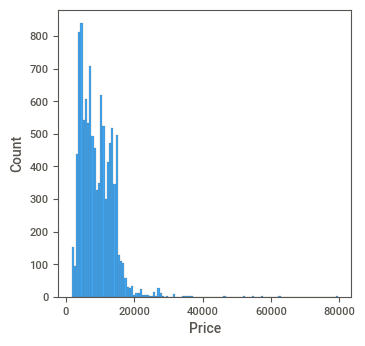

In [15]:
import seaborn as sns
plt.figure(figsize=(10,10))
plotnum=1
for i in num_feat:
    plt.subplot(3,3,plotnum)
    sns.histplot(x=data[i])
    plotnum+=1
plt.tight_layout()
plt.show()    

### 4.1.AIRLINE

<Axes: xlabel='Airline', ylabel='count'>

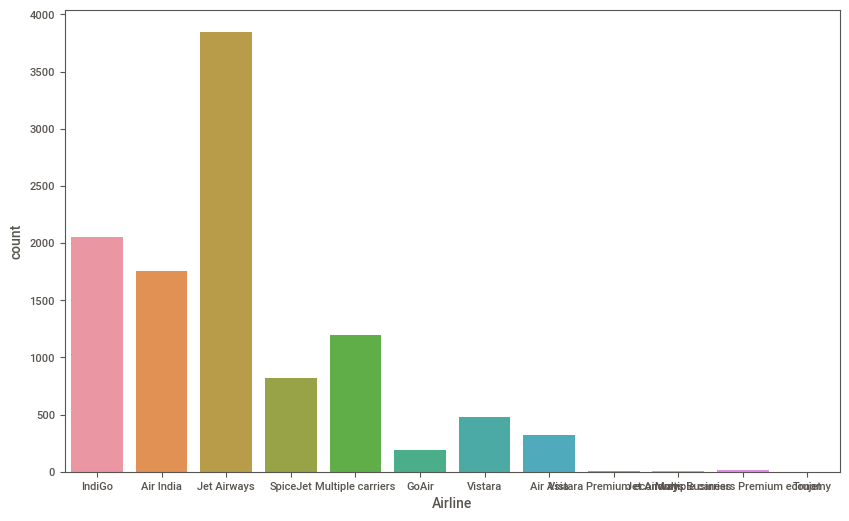

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x="Airline",data=data)


### Insights:
* From the countplot drawn here, we can see that Jet Airways is the costliest among all the flights followed by IndiGo

### 4.2. SOURCE

<Axes: xlabel='Source', ylabel='count'>

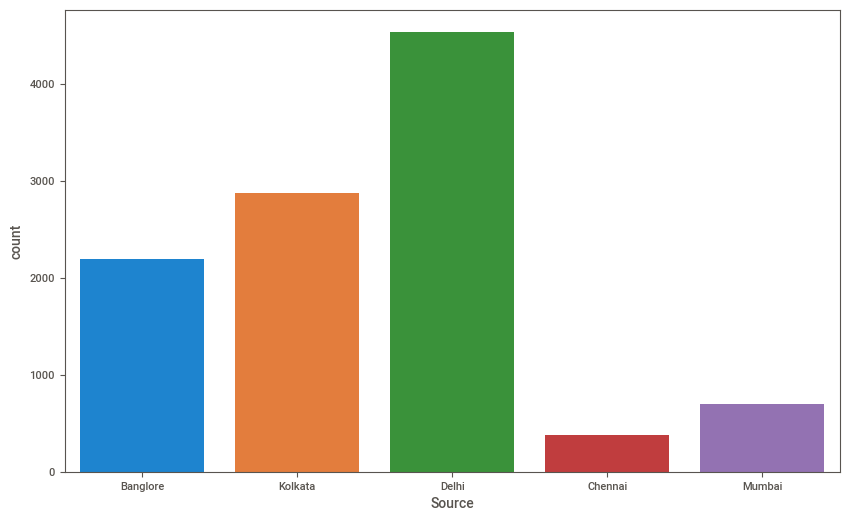

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source",data=data)


#### INSIGHTS:

* Delhi has highest take off or originating point for all the flights followed by Kolkata and Banglore respectivel

### 4.3. DESTINATION

<Axes: xlabel='Destination', ylabel='count'>

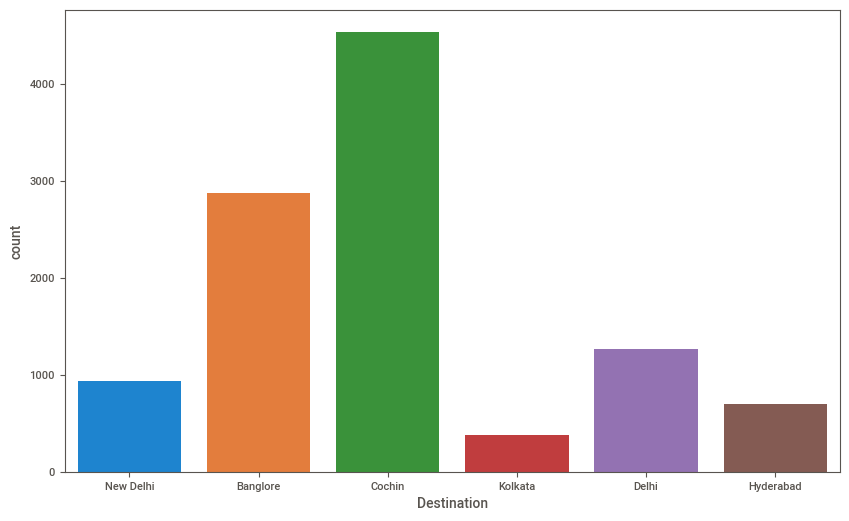

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=data)


### Insights
- Cochin has the highest landing or arrival of the flights from different places followed by Banglore and Delhi.

### 4.4. TOTAL STOPS

<Axes: xlabel='Total_Stops', ylabel='count'>

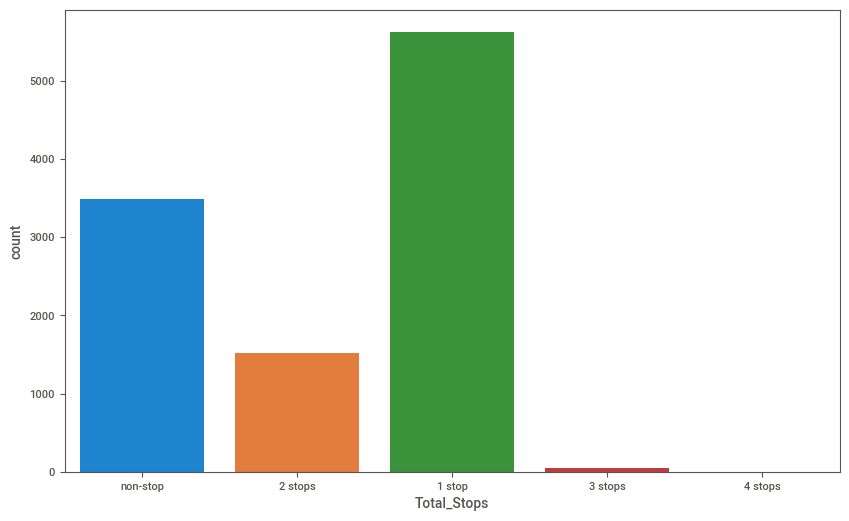

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)


#### INSIGHTS:

* Most flights have single stop in between taking off and landing at the destination followed by non-stop.

### 4.5. ADDITIONAL INFO

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

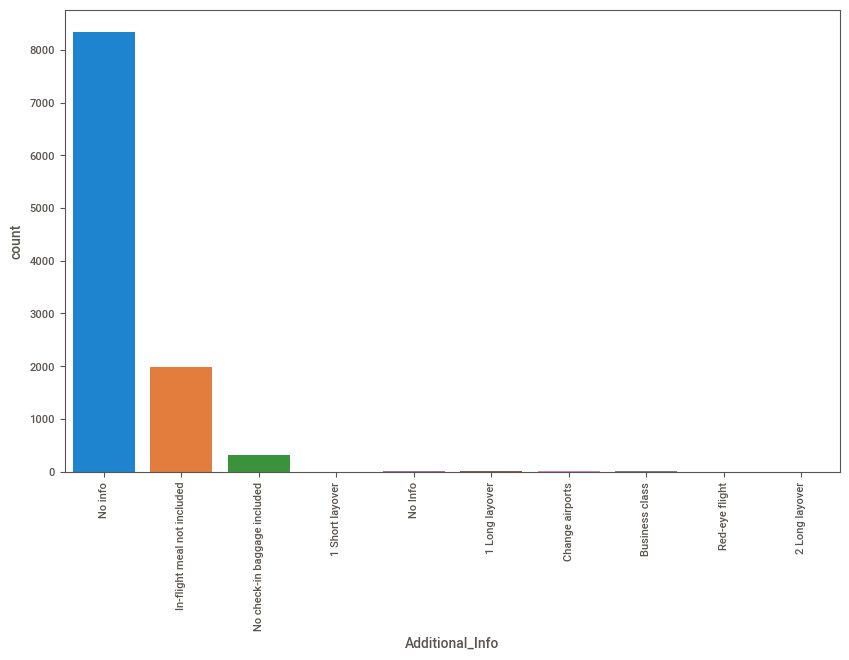

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info",data=data)
plt.xticks(rotation=90)

#### INSIGHTS:

* Most of the flights do not have any extra information

* There are few flights with extra information of "in-flight meal not included" followed by "No Check-in baggage included"

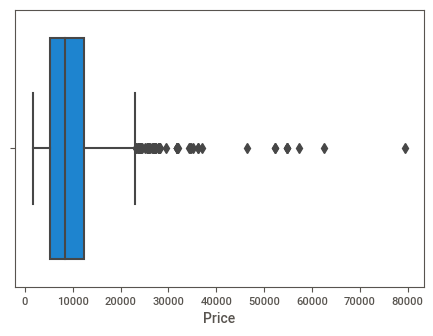

In [21]:
plt.figure(figsize=(13,13))
plotnum=1
for i in num_feat:
    plt.subplot(4,3,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
plt.tight_layout()
plt.show()

## Bi Variate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

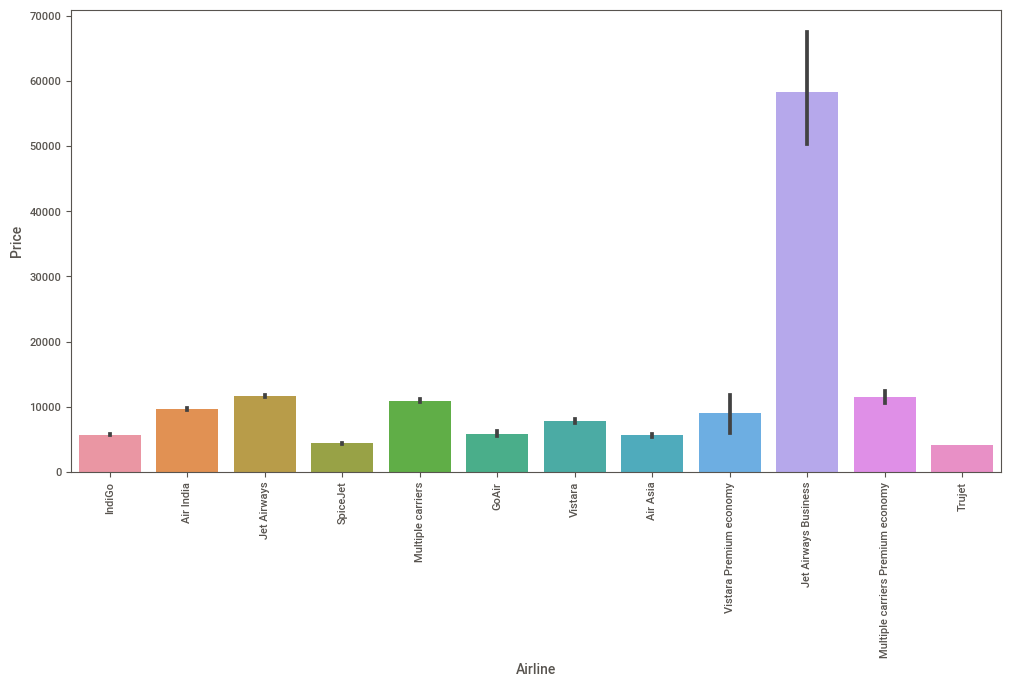

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=data)
plt.xticks(rotation=90)

### Insights
* Jet Airways Business has the highest price when compared to others.


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

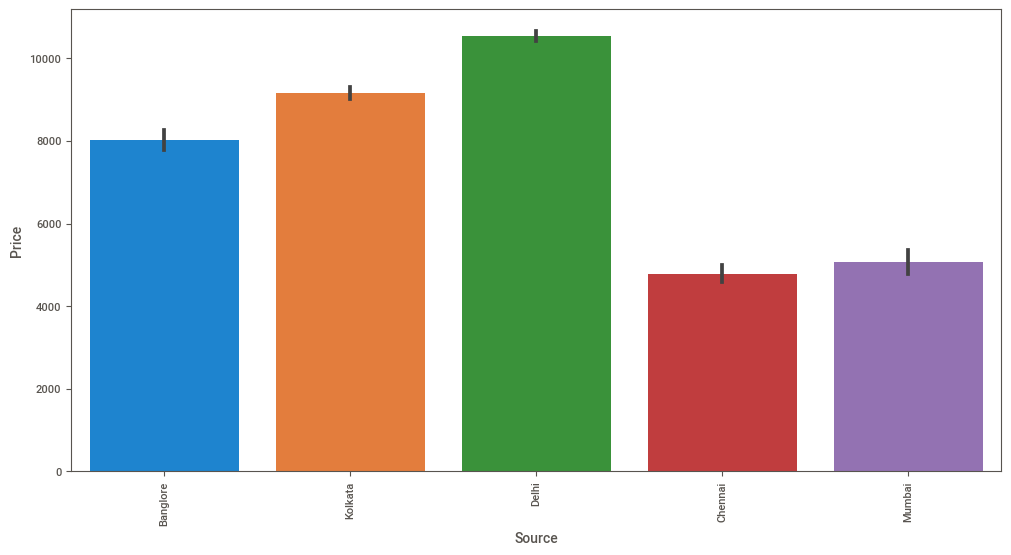

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x="Source",y="Price",data=data)
plt.xticks(rotation=90)

### Insights
* Flight price from Delhi is high followed by Kolkata

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

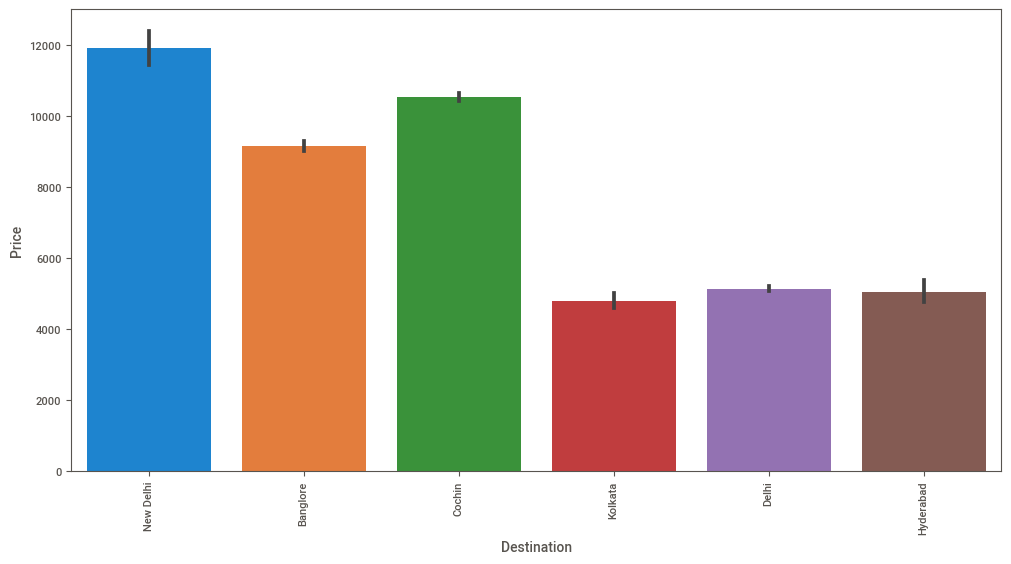

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x="Destination",y="Price",data=data)
plt.xticks(rotation=90)

### Insights:
* Flight price to New Delhi is high followed by Cochin


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

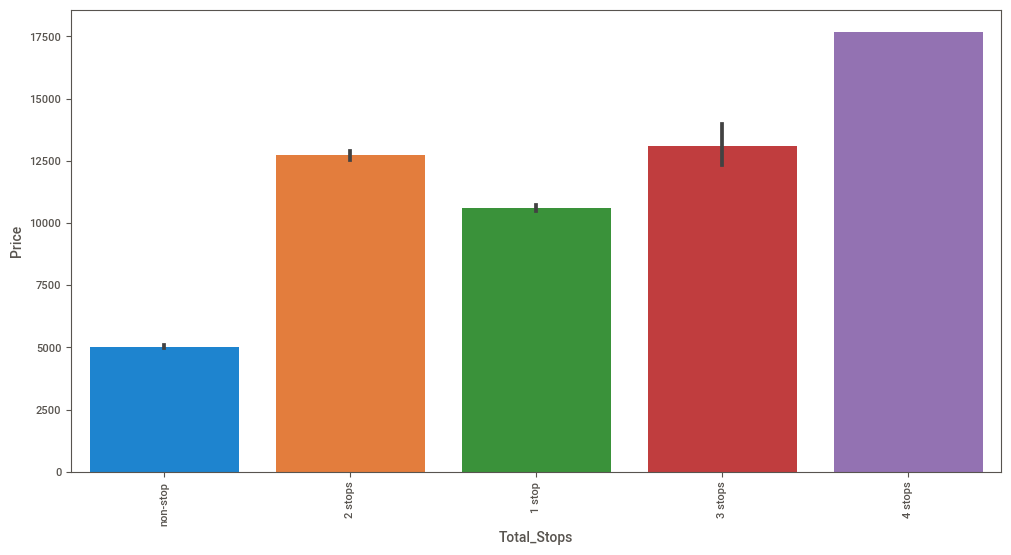

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x="Total_Stops",y="Price",data=data)
plt.xticks(rotation=90)

### Insights:
* Flight price is high if the total stop is equal to 4

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

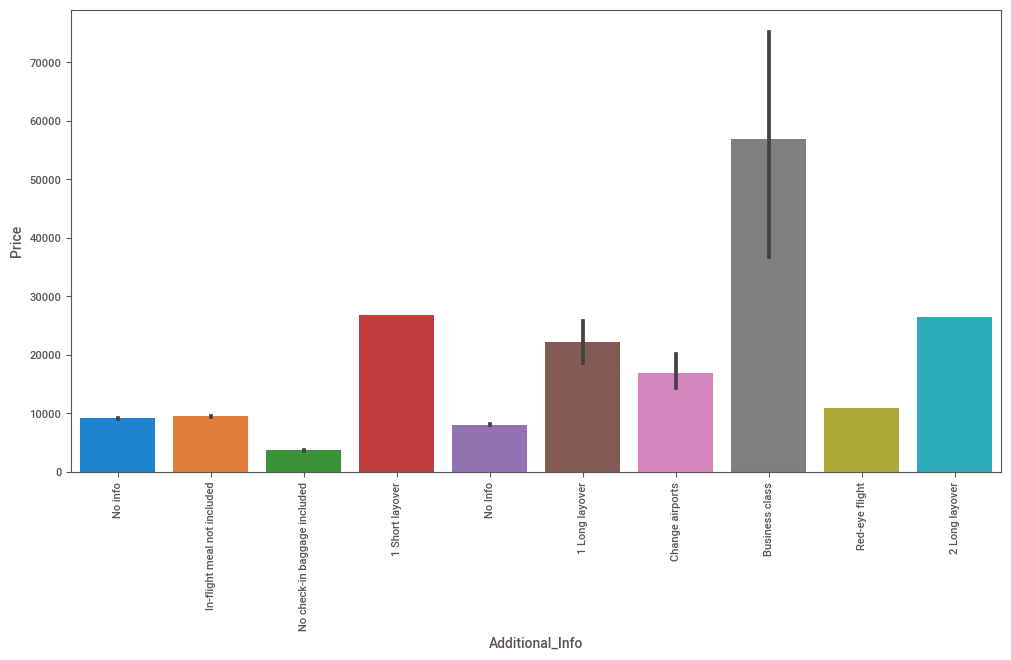

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x="Additional_Info",y="Price",data=data)
plt.xticks(rotation=90)

### Insights:
* Regrading additional info , we can say that business class has got highest flight price.


# 5. Data Preprocessing

In [27]:
# To see if there is any null values in the dataset
data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [28]:
# Since there are only two missing values which is relatively small compared to the dataset,we can drop it
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Duplicates

In [30]:
# Checking duplicates
data.duplicated().sum()

220

In [31]:
# droping duplicates
data=data.drop_duplicates(keep='first')

In [32]:
data.duplicated().sum()

0

### Outlier Handling :
We can check outliers in numerical columns by plotting a box plot

<Axes: >

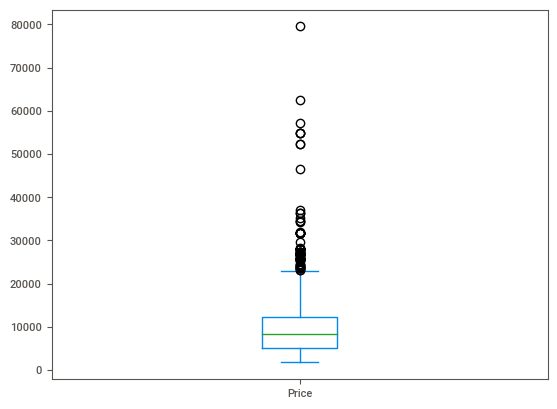

In [33]:
data["Price"].plot(kind="box")

In [34]:
Q1=data["Price"].quantile(0.25)
Q2=data["Price"].quantile(0.50)
Q3=data["Price"].quantile(0.75)

In [35]:
data["Price"].median()

8266.0

In [36]:
print(Q1)
print(Q2)
print(Q3)

5224.0
8266.0
12344.75


In [37]:
data["Price"].describe()

count    10462.000000
mean      9026.790289
std       4624.849541
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12344.750000
max      79512.000000
Name: Price, dtype: float64

In [38]:
IQR=Q3-Q1
IQR

7120.75

In [39]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(upper)
lower

23025.875


-5457.125

In [40]:
data = data[(data['Price'] >= lower) & (data['Price'] <= 21000)]

<Axes: >

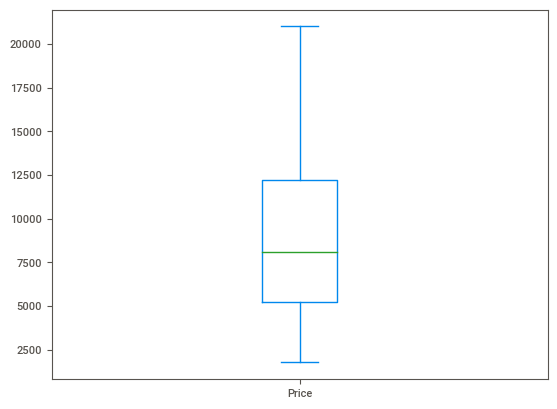

In [41]:
data["Price"].plot(kind="box")

In [42]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### Converting categorical values to numerical values :

In [43]:
# Airline

In [44]:
df1=pd.get_dummies(data['Airline'],prefix='Airline',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Airline'],axis=1)

In [45]:
data["Date_of_Journey"]=pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10329 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date_of_Journey                            10329 non-null  datetime64[ns]
 1   Source                                     10329 non-null  object        
 2   Destination                                10329 non-null  object        
 3   Route                                      10329 non-null  object        
 4   Dep_Time                                   10329 non-null  object        
 5   Arrival_Time                               10329 non-null  object        
 6   Duration                                   10329 non-null  object        
 7   Total_Stops                                10329 non-null  object        
 8   Additional_Info                            10329 non-null  object        
 9   Price            

In [47]:
data["Journey_day"]=data["Date_of_Journey"].dt.day
data["Journey_month"]=data["Date_of_Journey"].dt.month


In [48]:
data.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [49]:
data.head()

,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,...,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month
0,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,...,1,0,0,0,0,0,0,0,24,3
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,...,0,0,0,0,0,0,0,0,1,5
2,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,...,0,1,0,0,0,0,0,0,9,6
3,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,...,1,0,0,0,0,0,0,0,12,5
4,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,...,1,0,0,0,0,0,0,0,1,3


In [50]:
data.drop(columns=['Route'],axis=1,inplace=True)
data.head(2)

,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month
0,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,0,0,0,0,24,3
1,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,0,0,0,0,1,5


In [51]:
#Dep_Time

In [52]:
data["Dep_Time"]=pd.to_datetime(data.Dep_Time)
data["Dep_hour"]=data["Dep_Time"].dt.hour
data["Dep_min"]=data["Dep_Time"].dt.minute

In [53]:
#Arrival_Time

In [54]:
data["Arrival_Time"]=pd.to_datetime(data.Arrival_Time)
data["Arrival_hour"]=data["Arrival_Time"].dt.hour
data["Arrival_min"]=data["Arrival_Time"].dt.minute

In [55]:
data.drop(columns=["Dep_Time","Arrival_Time"],axis=1,inplace=True)
data.head(2)

,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Banglore,New Delhi,2h 50m,non-stop,No info,3897,0,0,1,0,...,0,0,0,0,24,3,22,20,1,10
1,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,0,0,0,...,0,0,0,0,1,5,5,50,13,15


In [56]:
duration=list(data["Duration"])

In [57]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute #why strip is used here?
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [58]:
data['Duration_hours'] = duration_hours
data['Duration_minutes'] = duration_mins
data.drop(columns=['Duration'],axis=1,inplace=True)
data.head(2)

,Source,Destination,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Banglore,New Delhi,non-stop,No info,3897,0,0,1,0,0,...,0,0,24,3,22,20,1,10,2,50
1,Kolkata,Banglore,2 stops,No info,7662,1,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25


In [59]:
data.columns

Index(['Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Price',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [60]:
data.replace({'Total_Stops':{'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}},inplace=True)
data.head()

,Source,Destination,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Banglore,New Delhi,0,No info,3897,0,0,1,0,0,...,0,0,24,3,22,20,1,10,2,50
1,Kolkata,Banglore,2,No info,7662,1,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25
2,Delhi,Cochin,2,No info,13882,0,0,0,1,0,...,0,0,9,6,9,25,4,25,19,0
3,Kolkata,Banglore,1,No info,6218,0,0,1,0,0,...,0,0,12,5,18,5,23,30,5,25
4,Banglore,New Delhi,1,No info,13302,0,0,1,0,0,...,0,0,1,3,16,50,21,35,4,45


In [61]:
data.drop(columns=["Additional_Info"],axis=1,inplace=True)
data.head(2)

,Source,Destination,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Banglore,New Delhi,0,3897,0,0,1,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,Kolkata,Banglore,2,7662,1,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25


In [62]:
data.columns

Index(['Source', 'Destination', 'Total_Stops', 'Price', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

In [63]:
data.head(2)

,Source,Destination,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara,Airline_Vistara Premium economy,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,Banglore,New Delhi,0,3897,0,0,1,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,Kolkata,Banglore,2,7662,1,0,0,0,0,0,...,0,0,1,5,5,50,13,15,7,25


In [64]:
df3=pd.get_dummies(data['Source'],prefix='Source',drop_first=True)
data=pd.concat([data,df3],axis=1).drop(['Source'],axis=1)

In [65]:
df4=pd.get_dummies(data['Destination'],prefix='Destination',drop_first=True)
data=pd.concat([data,df4],axis=1).drop(['Destination'],axis=1)

In [66]:
data.head(2)

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Duration_minutes,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,0,0,1,0,0,0,0,0,...,50,0,0,0,0,0,0,0,0,1
1,2,7662,1,0,0,0,0,0,0,0,...,25,0,0,1,0,0,0,0,0,0


In [67]:
len(data.columns)

29

<Axes: >

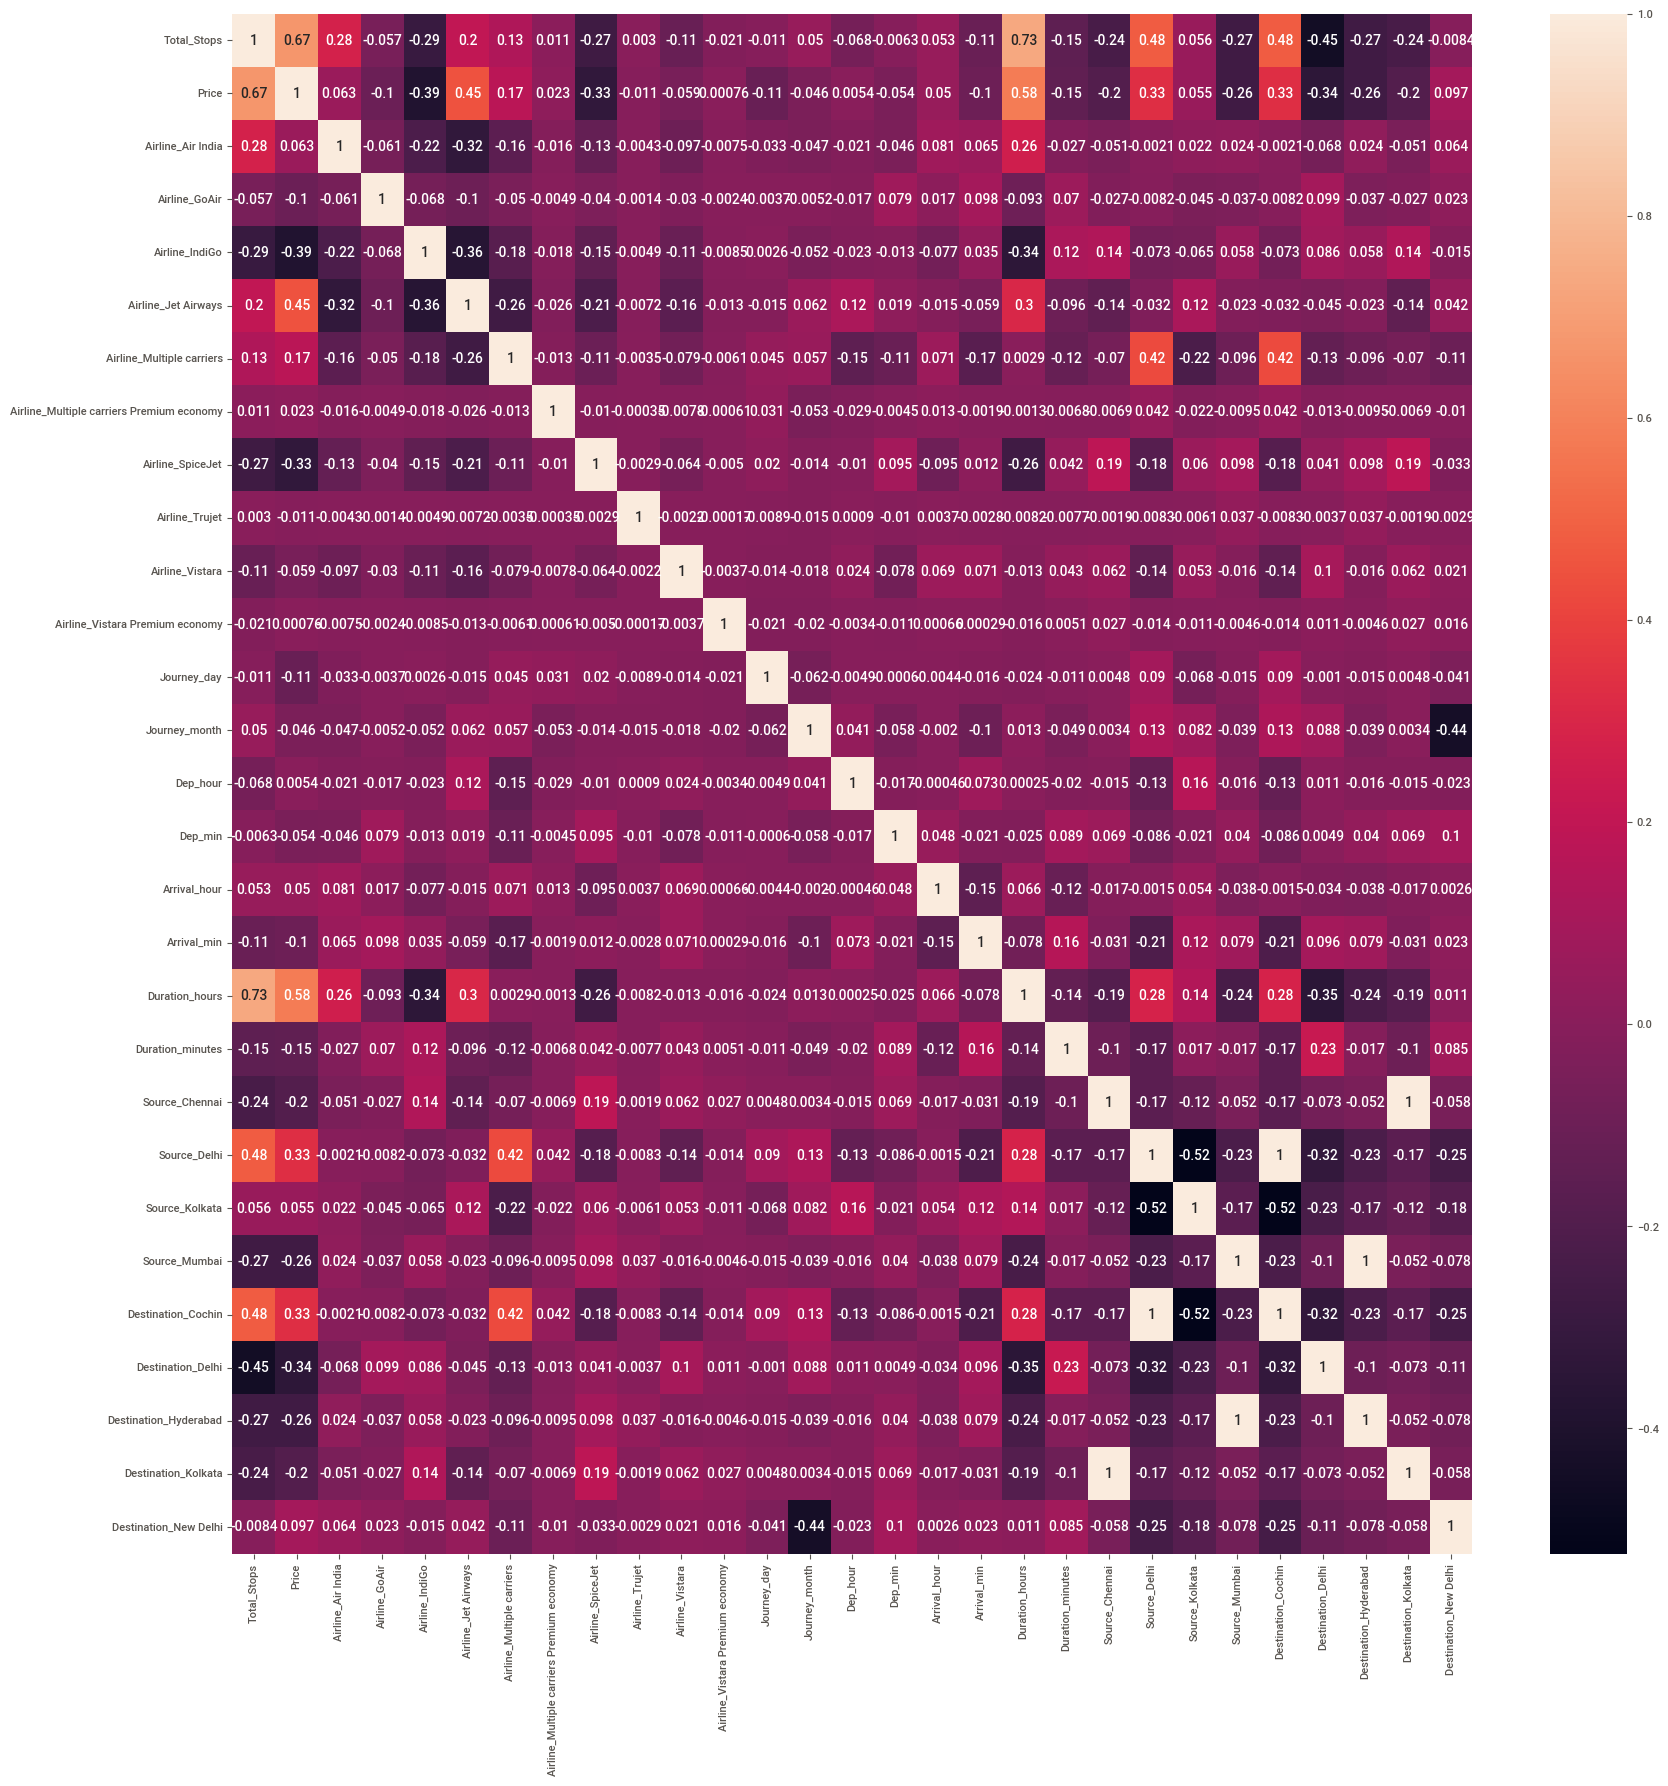

In [68]:
# Plotting heatmap to find the correlation between independent to independent and independent to dependent variables

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True)


#### INSIGHTS:

* If two variables are highly correlated (e.g., correlation coefficient close to +1 or -1), it may be advisable to drop one of them to reduce multicollinearity.

* Here , we dont have such variables. So no need to drop any column

# 6. Model creation

* So far we have done domain analysis , exploratory data analysis , data pre-processing and feature selection.

* Now we can start building various models and see which model holds best accuracy

* We have the following machine learning models for regression:

    - Linear Regressor

    - Decision Tree Regressor

    - Random Forest Regressor

    - XGBRegressor

## LINEAR REGRESSION

In [69]:
x=data.drop('Price',axis=1)
y=data.Price

In [70]:
# Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)   # Random state can be any value b/w 1-100, it is used to select random values from the data

In [71]:
# train the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [72]:
# Prediction
y_pred=LR.predict(x_test)

In [73]:
y_test

9363    14781
11       4174
2334     7408
4459     4823
7208     9535
        ...  
4652     3597
6202     7005
6146    10441
4339    14441
9901     4282
Name: Price, Length: 2066, dtype: int64

In [74]:
y_pred

array([11442.41820019,  4933.86586383, 10489.37760958, ...,
       11131.25058891, 13944.73679892,  3033.10355801])

In [75]:
LR.intercept_

6272.676669910772

In [76]:
LR.coef_

array([ 2.53602925e+03,  1.74739386e+03,  5.29886867e+01,  3.65768640e+02,
        4.31356663e+03,  3.49053617e+03,  4.53920473e+03, -1.17891233e+02,
       -1.97516274e+03,  2.24809125e+03,  3.62360216e+03, -5.46638030e+01,
       -3.20387504e+02,  1.27418126e+01, -3.73370687e+00, -4.91368562e+00,
        2.86785148e+00,  1.16724927e+01,  1.59634147e+00,  8.71829293e+01,
        2.26972630e+02,  2.51909224e+02, -7.94536770e+02,  2.26972630e+02,
       -6.97120089e+02, -7.94536770e+02,  8.71829293e+01,  9.25592076e+02])

# 7.Model Evaluation

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [78]:
MSE=mean_squared_error(y_test,y_pred)
MSE       # we cannot conclude using MSE because we don't know the min & max value of MSE

5639105.6169696795

In [79]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1781.883808572415

In [80]:
R2_Score=r2_score(y_test,y_pred)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score 

0.6492217761322516

In [81]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(x_train, y_train)
y_pred_Ls=Ls.predict(x_test)

print("Lasso Regression Score on Training set is",Ls.score(x_train, y_train))#Training Accuracy
print("Lasso Regression Score on Test Set is",Ls.score(x_test, y_test))#Testing Accuracy


mae=mean_absolute_error(y_pred_Ls, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred_Ls)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_Ls)))

print('The r2_score is',r2_score(y_test,y_pred_Ls))

Lasso Regression Score on Training set is 0.6534012703731031
Lasso Regression Score on Test Set is 0.649744565136362
Mean Absolute Error: 1779.2903215862045
Mean Squared Error: 5630701.268555277
RMSE: 2372.9098736688834
The r2_score is 0.649744565136362


In [82]:
from sklearn.linear_model import Ridge
Rd=Ridge()
Rd.fit(x_train, y_train)
y_pred_Rd=Rd.predict(x_test)

print("Ridge Regression Score on Training set is",Rd.score(x_train, y_train))#Training Accuracy
print("Ridge Regression Score on Test Set is",Rd.score(x_test, y_test))#Testing Accuracy


mae=mean_absolute_error(y_pred_Rd, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred_Rd)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_Rd)))

print('The r2_score is',r2_score(y_test,y_pred_Rd))
 

Ridge Regression Score on Training set is 0.6536896009377091
Ridge Regression Score on Test Set is 0.6494692241522593
Mean Absolute Error: 1780.6425051182798
Mean Squared Error: 5635127.646204711
RMSE: 2373.8423802360408
The r2_score is 0.6494692241522593


In [83]:
#Elastic net Regression
from sklearn.linear_model import ElasticNet
EN=ElasticNet()
EN.fit(x_train, y_train)
y_pred_EN=EN.predict(x_test)

print("Elastic net Regression Score on Training set is",EN.score(x_train, y_train))#Training Accuracy
print("Elastic net Regression Score on Test Set is",EN.score(x_test, y_test))#Testing Accuracy


mae=mean_absolute_error(y_pred_EN, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred_EN)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_EN)))

print('The r2_score is',r2_score(y_test,y_pred_EN))
 

Elastic net Regression Score on Training set is 0.5079048911592177
Elastic net Regression Score on Test Set is 0.5073167146439365
Mean Absolute Error: 2227.9923733825376
Mean Squared Error: 7920369.318267414
RMSE: 2814.3150708951216
The r2_score is 0.5073167146439365


## DECISION TREE

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [85]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [86]:
y_pred_dt=dt.predict(x_test)

In [87]:
MSE=mean_squared_error(y_test,y_pred_dt)
MSE 

4597961.525155964

In [88]:
R2_Score=r2_score(y_test,y_pred_dt)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score 

0.7139857121397262

## RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
R2_Score=r2_score(y_test,y_pred_rf)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score 

0.8133044892758238

## XGB Regressor

In [92]:
from xgboost import XGBRegressor
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [93]:
xg = XGBRegressor()
xg.fit(x_train,y_train)
y_pred_xg=gb.predict(x_test)
R2_Score=r2_score(y_test,y_pred_xg)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score 


0.779528194318108

# 8. Hyperparameter tuning

1. There are two ways of doing it:
* a) RandomizedSearchCV    
* b) GridSearchCV
2. assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=3, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-7492358.963 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-7341113.208 total time=   0.0s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-7293941.810 total time=   0.0s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-6891451.361 total time=   0.0s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8;, score=-7596637.044 total time=   0.0s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9;, score=-7517860.231 total time=   0.0s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=

In [95]:
y_pred_xg=grid_search.predict(x_test)
R2_Score=r2_score(y_test,y_pred_xg)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score 

0.8638383853547398

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=3, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan t

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\uti

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error on Test Set: 2840806.903259377


In [97]:
y_pred_rf=grid_search.predict(x_test)
R2_Score=r2_score(y_test,y_pred_rf)     # Since r2_score is ~ 1 ... hence the model performed well
R2_Score

0.8232887859241667

In [106]:
df=pd.DataFrame({'algorithms':['LinearRegression','Lasso','Ridge','Elasticnet','DicisionTree',"RandomForest","XGBoost",'XGBoost_Grid'],'R2_score':[0.6492,0.6497,0.6494,0.5073,0.7139,0.8133,0.7795,0.8638]})
df

,algorithms,R2_score
0,LinearRegression,0.6492
1,Lasso,0.6497
2,Ridge,0.6494
3,Elasticnet,0.5073
4,DicisionTree,0.7139
5,RandomForest,0.8133
6,XGBoost,0.7795
7,XGBoost_Grid,0.8638


<Axes: xlabel='algorithms', ylabel='R2_score'>

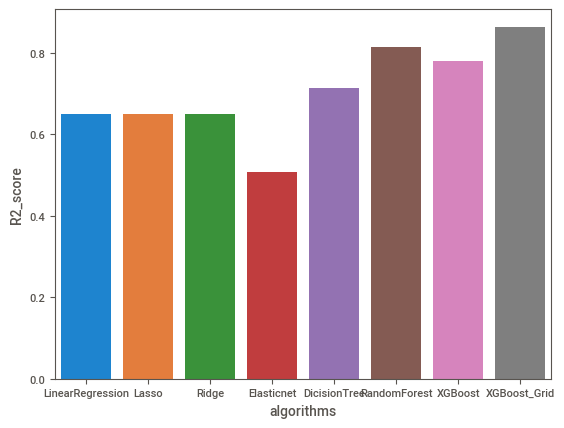

In [107]:
sns.barplot(x=df['algorithms'],y=df['R2_score'])

# 9.Conclusion

### 1. Introduction:

 * This report presents the findings and evaluation of machine learning models applied to predict flight prices. 
 
 * The primary objective was to develop accurate models that can assist in predicting flight prices based on various features     such as departure city, destination, airline, and departure time.

### 2. Data Overview:


* The dataset comprised information regarding airline, source,destination,date of journey , total stops etc.Preprocessing steps   includes handling missing values, encoding categorical variables, and handling outliers.

### 3. Model Selection:

* We experimented with multiple regression algorithms, including Linear Regression, KNN,Random Forest, and Gradient Boosting to   identify the most suitable model for predicting flight prices.

### 4. Evaluation Metrics:

* The performance of the models was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) metrics. These   metrics provide a clear understanding of the models' accuracy and ability to generalize to unseen data.

### 5. Model Performance Summary:

* The Gradient Boosting model demonstrated the highest accuracy in predicting flight prices, outperforming other models
  The random forest model also plays an important role for predicting flight fare which has got 0.81 % accuracy


# 10.Challenges faced:

The challenges that we faced during flight fare prediction using machine learning are as follows:

### 1. Conversion of date and duration: 

   - Extracting day and month from date of journey column was a tough task and challenging since the model finds it difficult
     to process thhe date format directly.

   - Converting these into a format that the model can understand can be messy and require careful preprocessing. 
    
   - At the same time , extracting hours and minutes from the duration column was a difficult task and it was solved by using        some functions in pandas and also using some simple logic.


###  2. Feature Correlation: 

  - When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging.

  - Correlation analysis helps identify which features are strongly related to the target variable (flight fare in this case) 
    and which are not.

  - However, for a large number of columns, this process can become complex and time-consuming.

###  3. Hyperparameter Tuning:

  - Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model to achieve optimal           performance. 
  
  - This process often requires multiple iterations of training and evaluating the model with different hyperparameter               configurations.
  
  - It can be time-consuming because it involves a search in a high-dimensional space of hyperparameters, and each iteration         requires training the model, which can be computationally expensive
  
  - We used hyper parameter tuning in random forest and gradient boosting which took much time to run the code for training and
    it is solved by making some small changes in the parameters
